In [2]:
%reload_ext autoreload
%autoreload 2

import config
import my_plotting as mp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
file_path = pd.read_csv('tbsh_gyeonggi_day_202507_이천시.csv')
df = file_path
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536716 entries, 0 to 536715
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ta_ymd           536716 non-null  int64 
 1   cty_rgn_no       536716 non-null  int64 
 2   admi_cty_no      536716 non-null  int64 
 3   card_tpbuz_cd    536716 non-null  object
 4   card_tpbuz_nm_1  536716 non-null  object
 5   card_tpbuz_nm_2  536716 non-null  object
 6   hour             536716 non-null  int64 
 7   sex              536716 non-null  object
 8   age              536716 non-null  int64 
 9   day              536716 non-null  int64 
 10  amt              536716 non-null  int64 
 11  cnt              536716 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 49.1+ MB


In [ ]:
# 한글폰트 설치
config.set_korean_font()

# amt, cnt 제외 카테고리화
df['day'] = df['day'].map(config.DAY_MAP)
df['hour'] = df['hour'].map(config.TIME_SHORT_MAP)
df['age'] = df['age'].map(config.AGE_MAP)

df['cty_rgn_no'] = df['cty_rgn_no'].astype('category')
df['admi_cty_no'] = df['admi_cty_no'].astype('category')
df['card_tpbuz_cd'] = df['card_tpbuz_cd'].astype('category')
df['card_tpbuz_nm_1'] = df['card_tpbuz_nm_1'].astype('category')
df['card_tpbuz_nm_2'] = df['card_tpbuz_nm_2'].astype('category')
df['hour'] = df['hour'].astype('category')
df['sex'] = df['sex'].astype('category')
df['age'] = df['age'].astype('category')
df['day'] = df['day'].astype('category')

#날짜
df['ta_ymd'] = pd.to_datetime(df['ta_ymd'], format="%Y%m%d")

df.info()

한글 폰트 설정이 완료되었습니다.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536716 entries, 0 to 536715
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   ta_ymd           536716 non-null  int64   
 1   cty_rgn_no       536716 non-null  category
 2   admi_cty_no      536716 non-null  category
 3   card_tpbuz_cd    536716 non-null  category
 4   card_tpbuz_nm_1  536716 non-null  category
 5   card_tpbuz_nm_2  536716 non-null  category
 6   hour             536716 non-null  category
 7   sex              536716 non-null  category
 8   age              536716 non-null  category
 9   day              536716 non-null  category
 10  amt              536716 non-null  int64   
 11  cnt              536716 non-null  int64   
dtypes: category(9), int64(3)
memory usage: 16.9 MB


C:\Users\owner\AppData\Local\Temp\ipykernel_13988\2349212868.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(range(1,32))


Text(0.5, 1.0, '2025-07월 전체 매출금액 & 매출건수')

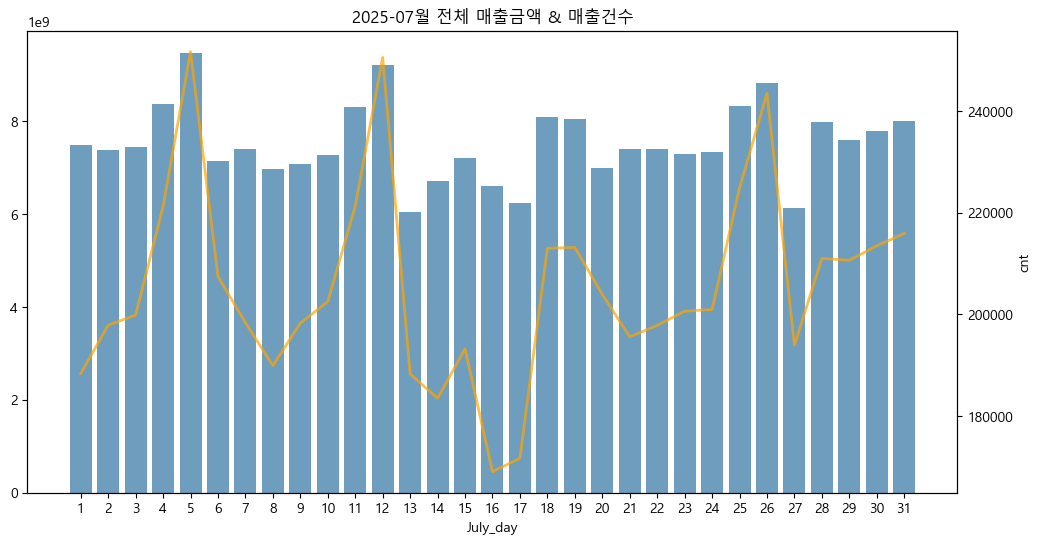

In [ ]:
#이중 축 그래프 생성하기(7월 한달동안 전체 매출총액과 건수 확인)

#일 컬럼 생성
df['July_day'] = df['ta_ymd'].dt.day-1

## 매출금액 + 기준년월일 / 매출건수 + 기준년월일
ymd_amount = df.groupby('July_day')['amt'].sum()
ymd_count = df.groupby('July_day')['cnt'].sum()

#그림판(도화지) 제공
fig, ax1 = plt.subplots(figsize=(12,6))

## bar
sns.barplot(x=ymd_amount.index, y=ymd_amount.values, ax=ax1, alpha=0.7)
ax1.set_xticklabels(range(1,32))

# 이중 축 (매출건수)
ax2 = ax1.twinx()

sns.lineplot(data = ymd_count, linewidth = 2, linestyle='-', ax=ax2, alpha=0.7, color='orange')

plt.title("2025-07월 전체 매출금액 & 매출건수")
